In [ ]:
# Import Tensorflow 2.0
import tensorflow as tf

# MIT introduction to deep learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml
# TODO: ENTER YOUR API KEY HERE!!
COMET_API_KEY = "SlOVi8odPsmG41Sa6o1iojnLY"

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0
assert COMET_API_KEY != "", "Please insert your Comet API Key"

In [ ]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="Handwriten digit classification")
comet_model_1 = comet_ml.Experiment()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gayathri/handwriten-digit-classification/d6f2b4c9cc9a48f6bc1d3c92fe45e432



In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 1s 0us/step


{'web': 'https://www.comet.com/api/image/download?imageId=646fc90bc2ac4dffb45cd3b788017370&experimentKey=d6f2b4c9cc9a48f6bc1d3c92fe45e432',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=646fc90bc2ac4dffb45cd3b788017370&experimentKey=d6f2b4c9cc9a48f6bc1d3c92fe45e432',
 'imageId': '646fc90bc2ac4dffb45cd3b788017370'}

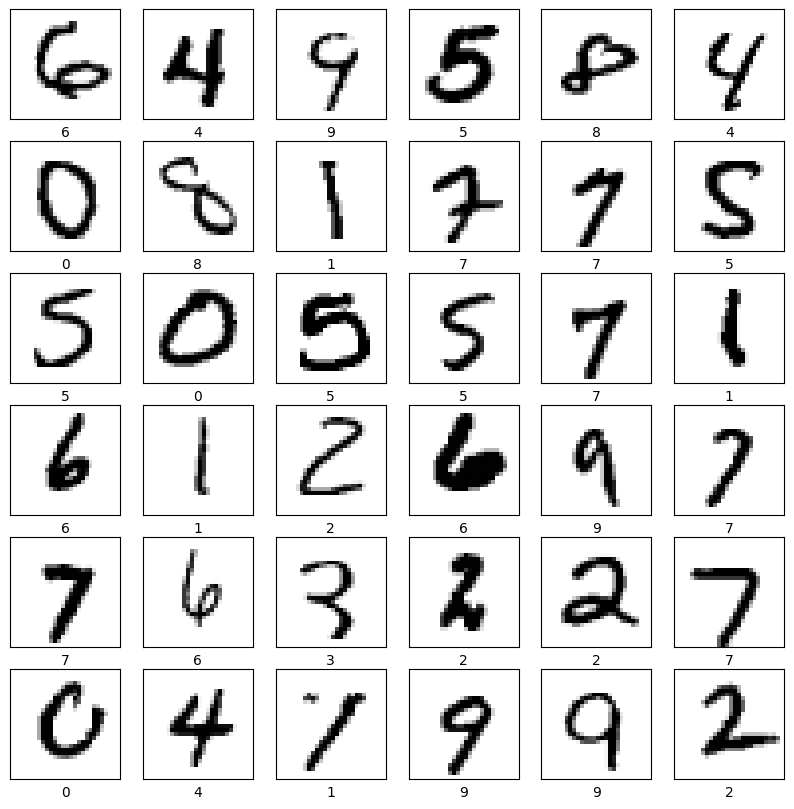

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)

In [ ]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        # First define a Flatten layer
        tf.keras.layers.Flatten(),

        # Define the activation function for the first fully connected (Dense) layer
        tf.keras.layers.Dense(128, activation='relu'),

        # Define the second Dense layer to output the classification probabilities
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return fc_model

model = build_fc_model()


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_1.end()

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8957
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1946 - accuracy: 0.9449
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1447 - accuracy: 0.9582
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1174 - accuracy: 0.9670
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0988 - accuracy: 0.9716


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : imperial_pollen_5245
COMET INFO:     url                   : https://www.comet.com/gayathri/handwriten-digit-classification/d6f2b4c9cc9a48f6bc1d3c92fe45e432
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.


In [ ]:
# Assuming test_images and test_labels are already defined
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9686
Test accuracy: 0.9685999751091003


In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Define the first convolutional layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

        # Define the first max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        # Define the second max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        # Define the last Dense layer to output the classification probabilities
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())


1/1 [==============================] - 1s 1s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 den

In [ ]:
import comet_ml

# Initialize Comet ML
comet_ml.init(project_name="Digit classification CNN")
comet_model_2 = comet_ml.Experiment()

# Define the compile operation with the optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gayathri/digit-classification-cnn/e10a221bc76a4d9f8b114cbc1a4ed907

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


In [ ]:
# Use model.fit to train the CNN model
cnn_model.fit(train_images, train_labels, batch_size=32, epochs=10)

# End the comet experiment
comet_model_2.end()


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1289 - accuracy: 0.9613
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : stable_penny_8423
COMET INFO:     url                   : https://www.comet.com/gayathri/digit-classification-cnn/e10a221bc76a4d9f8b114cbc1a4ed907
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
COMET INFO: Please wait for assets to finish uploading (timeout is 10800 seconds)
COMET INFO: All assets

In [ ]:
# Use the evaluate method to test the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9907
Test accuracy: 0.9907000064849854


In [ ]:
# Get the prediction for the first image in the test dataset
prediction = cnn_model.predict(test_images[[0]])

# Identify the digit with the highest confidence prediction
predicted_digit = prediction.argmax()

print('Predicted digit:', predicted_digit)


1/1 [==============================] - 0s 57ms/step
Predicted digit: 7


Label of this digit is: 7


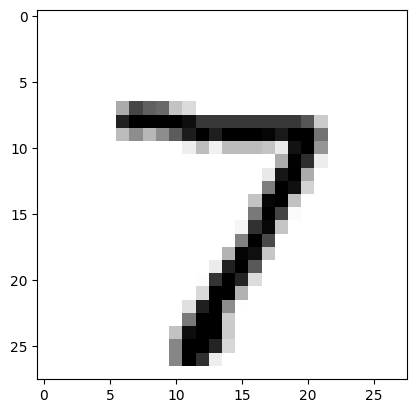

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
comet_model_2.log_figure(figure=plt)

313/313 [==============================] - 1s 2ms/step


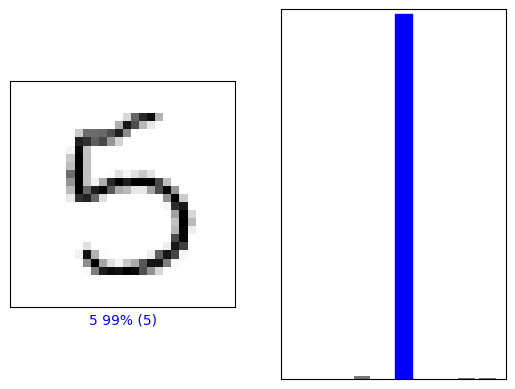

In [ ]:

import matplotlib.pyplot as plt

# Generate predictions (assuming you have a trained model named 'model')
predictions = model.predict(test_images)

# Define the image index you want to visualize
image_index = 53  # You can change this value as needed

# Plot the image prediction
plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)

# Plot the value prediction
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

# Log the figure with comet_model_2
comet_model_2.log_figure(figure=plt)

# Show the plots
plt.show()


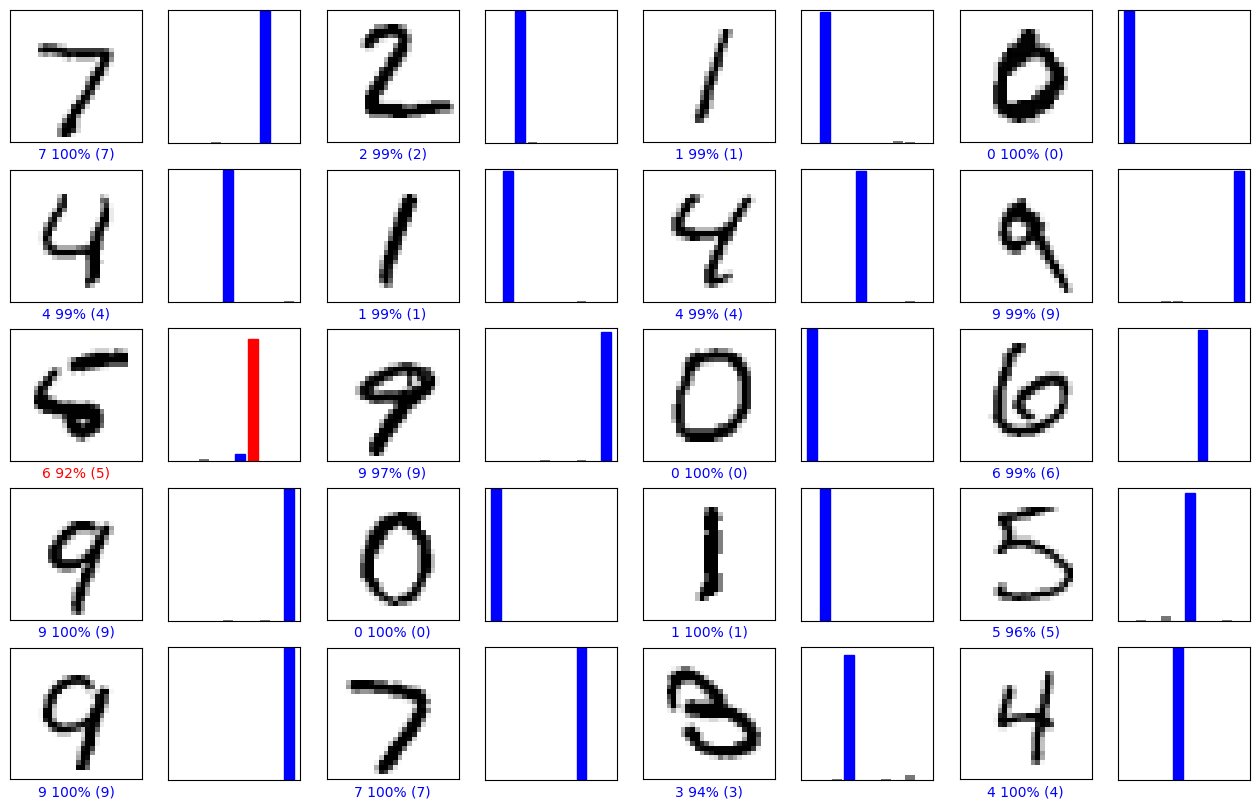

In [ ]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
comet_model_2.log_figure(figure=plt)
comet_model_2.end()

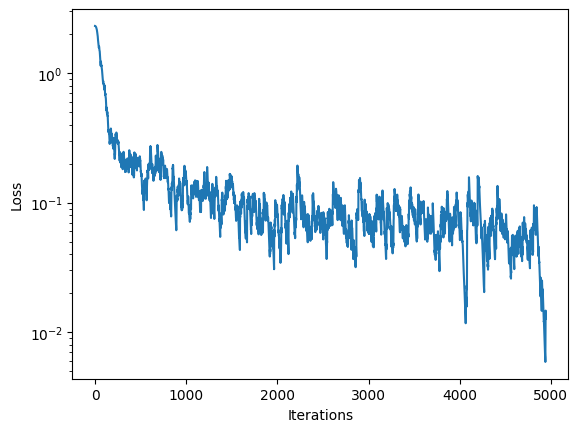

100%|██████████| 5000/5000 [01:44<00:00, 47.76it/s]
COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : smart_girder_9842
COMET INFO:     url                   : https://www.comet.com/gayathri/6-s191lab2-part1-cnn2/3d189b14c13f4bb98baed6ddf468a6be
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000] : (1.815908581193071e-05, 2.326050281524658)
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     sourc

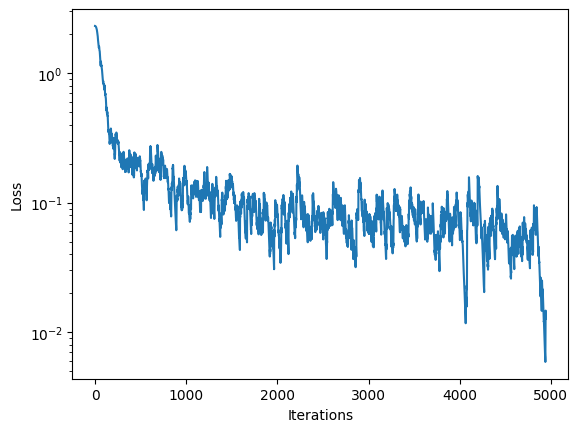

In [ ]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

# Initialize comet_ml
comet_ml.init(project_name="6.s191lab2_part1_CNN2")
comet_model_3 = comet_ml.Experiment()

if hasattr(tqdm, '_instances'):
    tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        # Feed the images into the model and obtain the predictions
        logits = cnn_model(images, training=True)

        # Compute the categorical cross entropy loss
        loss_value = tf.keras.losses.sparse_categorical_crossentropy(labels, logits)

        # Log the loss to comet
        comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)

    loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
    plotter.plot(loss_history.get())

    # Backpropagation
    # Use the tape to compute the gradient against all parameters in the CNN model
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

# Log the figure with comet_model_3
comet_model_3.log_figure(figure=plt)
comet_model_3.end()
